# Data mining Project

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import time

# Third-Party Libraries
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from memory_profiler import memory_usage
from pymining import itemmining, assocrules
from itertools import combinations
from mlxtend.frequent_patterns import apriori, association_rules 
from itertools import combinations


# Converting .txt to .csv

In [22]:
import pandas as pd

# Read the data from the file
file_path = 'data.txt'
df = pd.read_csv(file_path, delimiter='\t', header=None)

# Assign column names to the DataFrame
columns = [
    "ID", "Gender", "Age_Group", "Residence", "Education_Level", "Source_of_Income",
    "Marital_Status", "Smoked_Cigarettes", "Year_Diagnosed", "Surgical_Treatment",
    "Chemotherapy", "Radiotherapy", "Immunotherapy", "Molecular_targeted_Therapy",
    "Hospitalization_Number", "Time_to_Treatment", "Medical_Treatment_Need",
    "Emotional_Impact", "Travel_Impact", "Quality_of_Life", "Symptoms_exp_cough",
    "Symptoms_exp_Hoarseness", "Symptoms_exp_Blood_cough", "Symptoms_exp_chestpain",
    "Symptoms_exp_Shortness_of_breath", "Symptoms_exp_weakness", "Symptoms_exp_None",
    "Symptom_Frequency", "Symptom_Household_Impact", "Sleep_Issues", "Support_From_Close",
    "Dependency_Fear", "Health_Satisfaction", "Daily_Life_Impact_physical", "Daily_Life_Impact_Psychological",
    "Daily_Life_Impact_proffesional", "Daily_Life_Impact_family_life", "Daily_Life_Impact_social_life",
    "Daily_Life_Impact_no_effect", "Energy_Level", "Self_Care", "Daily_Activities_Difficulty",
    "Work_Readiness", "Support_Satisfaction", "Coping_Strategy", "Negative_Emotions"
]
df.columns = columns
df_model=df.copy()
print(df.shape)
# List of single-choice categorical variables to be one-hot encoded
single_choice_vars = [
    'Gender', 'Age_Group', 'Residence', 'Education_Level', 'Source_of_Income', 'Marital_Status',
    'Hospitalization_Number', 'Time_to_Treatment', 'Medical_Treatment_Need', 'Quality_of_Life',
    'Symptom_Frequency', 'Symptom_Household_Impact', 'Sleep_Issues', 'Dependency_Fear',
    'Energy_Level', 'Self_Care', 'Daily_Activities_Difficulty', 'Work_Readiness',
    'Support_Satisfaction', 'Coping_Strategy', 'Negative_Emotions'
]

# Mapping of variables to their options for meaningful labels
options_dict = {
    'Gender': {1: 'Female', 2: 'Male', 3: 'Nonbinary', 4: 'Prefer_not_to_say'},
    'Age_Group': {1: 'Below_30', 2: '30_45', 3: '46_60', 4: 'Above_60'},
    'Residence': {1: 'Village', 2: 'Town_upto_100k', 3: 'Town_100k_500k', 4: 'City_over_500k'},
    'Education_Level': {1: 'Primary', 2: 'Vocational', 3: 'Secondary', 4: 'Higher'},
    'Source_of_Income': {1: 'Employment', 2: 'Pension', 3: 'Retirement', 4: 'Other'},
    'Marital_Status': {1: 'Single', 2: 'Married', 3: 'Divorced', 4: 'Widowed'},
    'Hospitalization_Number': {1: 'Zero', 2: 'One_to_three', 3: 'Three_to_five', 4: 'Above_five'},
    'Time_to_Treatment': {1: 'Up_to_one_month', 2: 'One_to_three_months', 3: 'More_than_three_months'},
    'Medical_Treatment_Need': {1: 'Not_at_all', 2: 'Moderately', 3: 'Large_extent', 4: 'Very_large_extent'},
    'Quality_of_Life': {1: 'Very_good', 2: 'Good', 3: 'Bad', 4: 'Very_bad'},
    'Symptom_Frequency': {1: 'Did_not_occur', 2: 'Rather_rarely', 3: 'Most_of_time', 4: 'All_the_time'},
    'Symptom_Household_Impact': {1: 'Do_not_affect', 2: 'Rarely_affect', 3: 'Often_affect', 4: 'Always_affect'},
    'Sleep_Issues': {1: 'Not_once', 2: 'Rather_rarely', 3: 'Most_of_time', 4: 'All_the_time'},
    'Dependency_Fear': {1: 'Not_afraid', 2: 'Minimally', 3: 'Large_extent', 4: 'Very_large_extent'},
    'Energy_Level': {1: 'Fully', 2: 'Mostly', 3: 'Very_little', 4: 'Not_at_all'},
    'Self_Care': {1: 'No_problems', 2: 'Minor_problems', 3: 'Serious_problems', 4: 'Cannot_perform'},
    'Daily_Activities_Difficulty': {1: 'No_problems', 2: 'Minor_problems', 3: 'Moderate_problems', 4: 'Serious_problems', 5: 'Unable_to_perform'},
    'Work_Readiness': {1: 'Satisfied', 2: 'Moderately_satisfied', 3: 'Dissatisfied'},
    'Support_Satisfaction': {1: 'Satisfied', 2: 'Moderately_satisfied', 3: 'Dissatisfied'},
    'Coping_Strategy': {1: 'Well', 2: 'Hard_to_say', 3: 'Badly'},
    'Negative_Emotions': {1: 'Never', 2: 'Rarely', 3: 'Often', 4: 'All_the_time'}
}


# Map numerical codes to meaningful labels
for var in single_choice_vars:
    if var in options_dict:
        df[var] = df[var].map(options_dict[var])

# One-hot encode the single-choice categorical variables
df = pd.get_dummies(df, columns=single_choice_vars)


# Save the processed data to a CSV file
df.to_csv('processed_survey_data_columns.csv', index=False)

# Display the first few rows of the processed DataFrame
df.head()


(300, 46)


ID  Smoked_Cigarettes  Year_Diagnosed  Surgical_Treatment  Chemotherapy  \
0   1                  1            2021                   0             1   
1   2                  1            2020                   1             1   
2   3                  1            2020                   1             0   
3   4                  1            2021                   1             1   
4   5                  1            2019                   1             1   

   Radiotherapy  Immunotherapy  Molecular_targeted_Therapy  Emotional_Impact  \
0             0              1                           0                 1   
1             0              0                           0                 1   
2             0              0                           0                 1   
3             0              0                           0                 1   
4             0              0                           0                 1   

   Travel_Impact  ...  Support_Satisfaction_Dissatisfied  \
0              1  ...                                  0   
1              1  ...                                  0   
2              1  ...                                  0   
3              1  ...                                  0   
4              1  ...                                  1   

   Support_Satisfaction_Moderately_satisfied  Support_Satisfaction_Satisfied  \
0                                          1                               0   
1                                          1                               0   
2                                          0                               1   
3                                          0                               1   
4                                          0                               0   

   Coping_Strategy_Badly  Coping_Strategy_Hard_to_say  Coping_Strategy_Well  \
0                      1                            0                     0   
1                      1                            0                     0   
2                      1                            0                     0   
3                      1                            0                     0   
4                      1                            0                     0   

   Negative_Emotions_All_the_time  Negative_Emotions_Never  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Negative_Emotions_Often  Negative_Emotions_Rarely  
0                        1                         0  
1                        1                         0  
2                        0                         1  
3                        0                         0  
4                        1                         0  

[5 rows x 103 columns]

# Data cleaning

In [23]:
# 1. Remove duplicate rows
df = df.drop_duplicates()
print(f"\nData after removing duplicates: {df.shape}")

# 2. Handle missing values
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing categorical values with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
print(f"\nData after handling missing values:\n{df.isnull().sum()}")

# 3. Drop irrelevant or redundant columns  
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# 4. Standardize column names  
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]


Data after removing duplicates: (300, 103)

Data after handling missing values:
ID                                0
Smoked_Cigarettes                 0
Year_Diagnosed                    0
Surgical_Treatment                0
Chemotherapy                      0
                                 ..
Coping_Strategy_Well              0
Negative_Emotions_All_the_time    0
Negative_Emotions_Never           0
Negative_Emotions_Often           0
Negative_Emotions_Rarely          0
Length: 103, dtype: int64


**All columns are integer value, numerical columns. But we have categorical columns in them like Gender, Marital Status, Smoked cigaretes, Chemoheraphy etc. ( some are binary, some are multiclass)**

In [8]:
df = pd.read_csv('processed_survey_data_columns.csv')

 
columns_to_exclude = ['ID', 'Year_Diagnosed']
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Convert all non-zero values to 1 (binary)
df_for_itemsets = df_for_itemsets.applymap(lambda x: 1 if x != 0 else 0)

 
patients = []
 
for index, row in df_for_itemsets.iterrows():
    # Extract the column names where the value is 1
    itemset = row[row == 1].index.tolist()
    patients.append(itemset)

# Display the first 5 patients
for i, transaction in enumerate(patients[:5]):
    print(f"Patient {i+1}: {transaction}")


Patient 1: ['Smoked_Cigarettes', 'Chemotherapy', 'Immunotherapy', 'Emotional_Impact', 'Travel_Impact', 'Symptoms_exp_cough', 'Symptoms_exp_Shortness_of_breath', 'Support_From_Close', 'Daily_Life_Impact_Psychological', 'Gender_Female', 'Age_Group_Below_30', 'Residence_Town_upto_100k', 'Education_Level_Higher', 'Source_of_Income_Employment', 'Marital_Status_Single', 'Hospitalization_Number_Three_to_five', 'Time_to_Treatment_One_to_three_months', 'Medical_Treatment_Need_Large_extent', 'Quality_of_Life_Good', 'Symptom_Frequency_Most_of_time', 'Symptom_Household_Impact_Often_affect', 'Sleep_Issues_Most_of_time', 'Dependency_Fear_Large_extent', 'Energy_Level_Mostly', 'Self_Care_No_problems', 'Daily_Activities_Difficulty_No_problems', 'Work_Readiness_Moderately_satisfied', 'Support_Satisfaction_Moderately_satisfied', 'Coping_Strategy_Badly', 'Negative_Emotions_Often']
Patient 2: ['Smoked_Cigarettes', 'Surgical_Treatment', 'Chemotherapy', 'Emotional_Impact', 'Travel_Impact', 'Symptoms_exp_Hoar

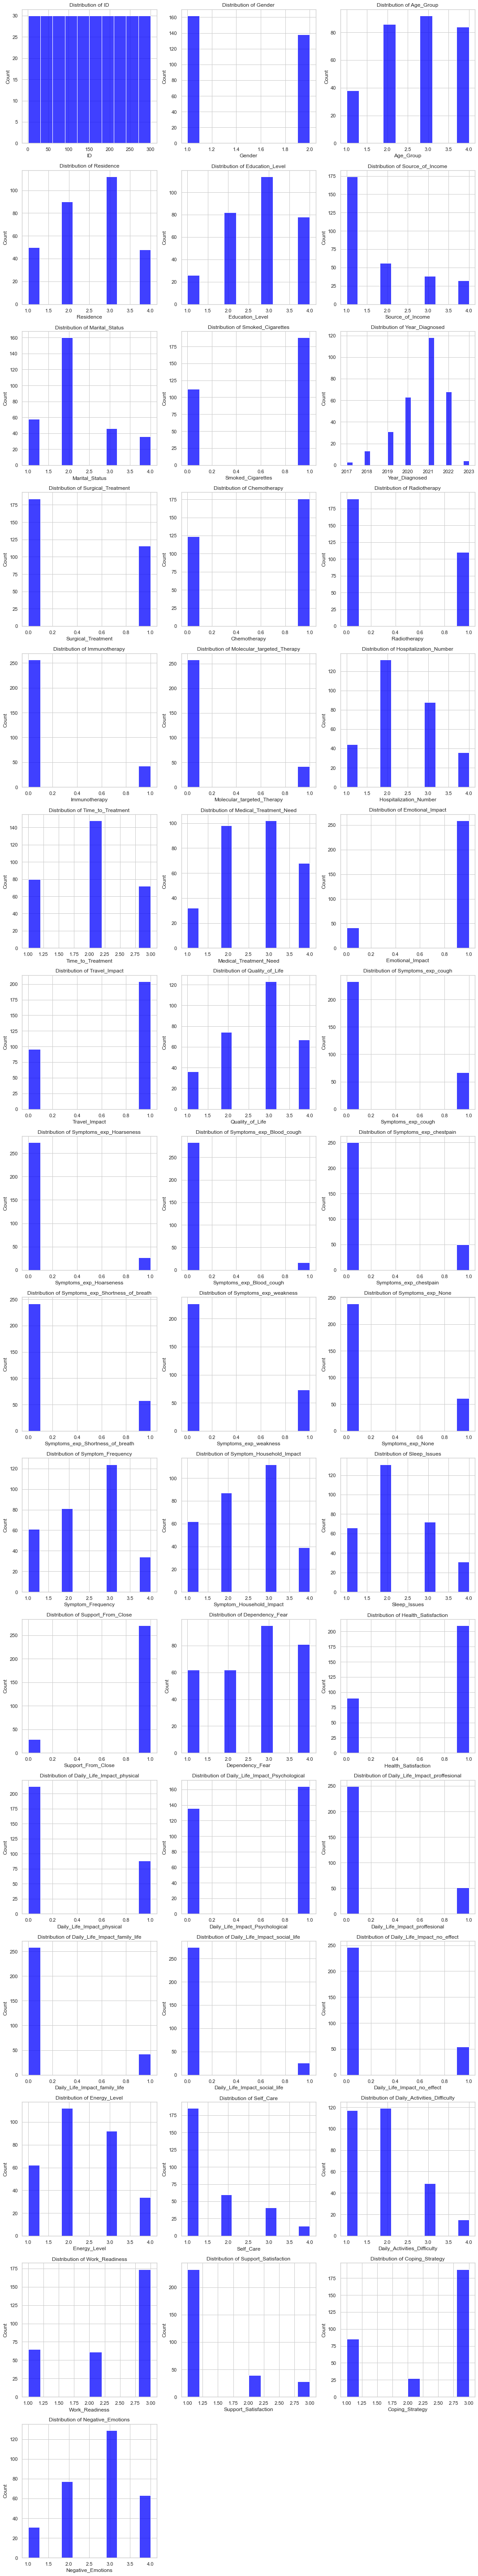

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot style
sns.set(style="whitegrid")

# Loop through each column in the DataFrame
def plot_features(df):
    n_features = len(df.columns)
    n_cols = 3  # Number of columns in the grid
    n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Calculate rows needed

    # Create a grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Flatten to easily loop through axes

    for i, col in enumerate(df.columns):
        ax = axes[i]
        
        if pd.api.types.is_numeric_dtype(df[col]):
            # Plot for numeric columns
            sns.histplot(df[col], kde=False, ax=ax, color="blue")
            ax.set_title(f"Distribution of {col}")
        elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':
            # Plot for categorical columns
            sns.countplot(x=df[col], ax=ax, palette="viridis")
            ax.set_title(f"Countplot of {col}")
            ax.tick_params(axis='x', rotation=45)
        else:
            # Plot for other data types if needed
            ax.text(0.5, 0.5, "Unsupported Data Type", fontsize=12, ha='center')
        
        ax.set_ylabel("Count")
    
    # Turn off unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Use the function on your dataset
plot_features(df_model)


<Axes: >

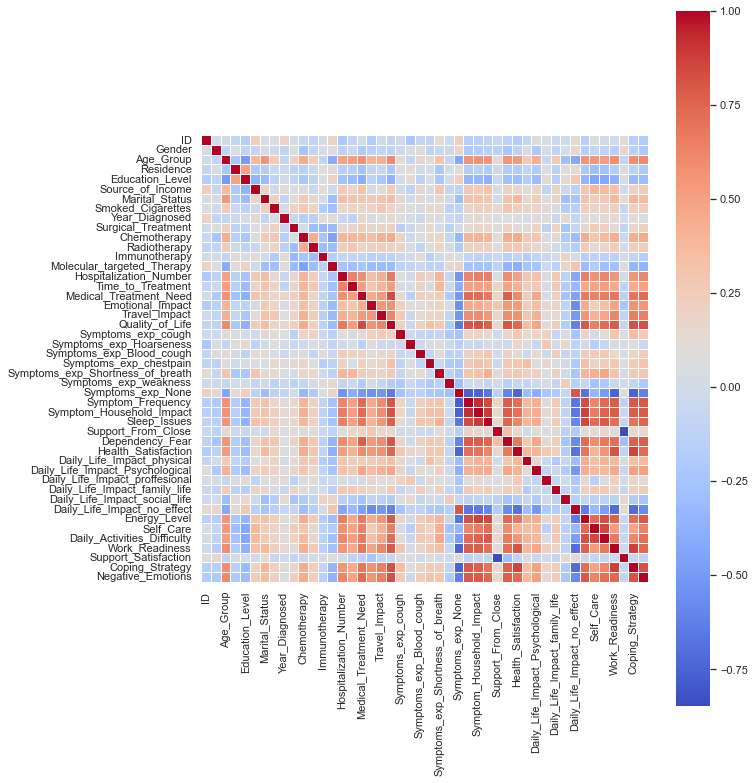

In [37]:

corr_matrix = df_model.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 16))

# Create the heatmap
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)

sns.heatmap(
    corr_matrix,
    annot=False,         # Show correlation coefficients
    fmt=".2f",          # Format for annotations
    cmap="coolwarm",    # Colormap
    cbar=True,          # Display color bar
    cbar_kws={"shrink": 0.8},  # Shrink the color bar

    square=True,        # Make cells square
    linewidths=0.5      # Add lines between cells
)


In [105]:
# Compute the correlation matrix
df_model = df_model.drop(['ID', 'Year_Diagnosed'], axis=1, errors='ignore')



# Assuming corr_matrix is your correlation matrix
corr_matrix = df_model.corr()

# Mask the upper triangle, including the diagonal
mask = np.triu(np.ones(corr_matrix.shape), k=0)
corr_matrix_lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

# Unstack the lower triangle of the correlation matrix
corr_pairs = corr_matrix_lower.unstack().dropna()

# Sort by absolute correlation value
corr_pairs_sorted = corr_pairs.sort_values(ascending=False)

# Convert to DataFrame for better readability
corr_pairs_df = corr_pairs_sorted.reset_index()
corr_pairs_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display the result


corr_pairs_df.tail(5)
# print(corr_pairs_df.tail(5))

# # Select the top 5 positive correlations
# top_5_positive = corr_pairs[corr_pairs > 0].head(5)

# # Select the top 5 negative correlations
# top_5_negative = corr_pairs[corr_pairs < 0].head(5)

# # Display the results
# print("Top 5 Positive Correlations:")
# print(top_5_positive)

# print("\nTop 5 Negative Correlations:")
# print(top_5_negative)

Feature 1                 Feature 2  Correlation
941   Symptoms_exp_None            Work_Readiness    -0.743244
942   Symptoms_exp_None  Symptom_Household_Impact    -0.743633
943   Symptoms_exp_None           Coping_Strategy    -0.762524
944   Symptoms_exp_None         Symptom_Frequency    -0.765180
945  Support_From_Close      Support_Satisfaction    -0.849597

In [68]:
df_model.head()

Gender  Age_Group  Residence  Education_Level  Source_of_Income  \
0       1          1          2                4                 1   
1       1          2          4                3                 1   
2       1          2          2                4                 1   
3       2          4          4                3                 3   
4       2          3          1                2                 1   

   Marital_Status  Smoked_Cigarettes  Surgical_Treatment  Chemotherapy  \
0               1                  1                   0             1   
1               2                  1                   1             1   
2               2                  1                   1             0   
3               2                  1                   1             1   
4               2                  1                   1             1   

   Radiotherapy  ...  Daily_Life_Impact_family_life  \
0             0  ...                              0   
1             0  ...                              0   
2             0  ...                              0   
3             0  ...                              0   
4             0  ...                              0   

   Daily_Life_Impact_social_life  Daily_Life_Impact_no_effect  Energy_Level  \
0                              0                            0             2   
1                              0                            0             2   
2                              0                            0             2   
3                              0                            0             4   
4                              0                            0             2   

   Self_Care  Daily_Activities_Difficulty  Work_Readiness  \
0          1                            1               2   
1          1                            2               2   
2          1                            1               2   
3          2                            3               3   
4          1                            1               3   

   Support_Satisfaction  Coping_Strategy  Negative_Emotions  
0                     2                3                  3  
1                     2                3                  3  
2                     1                3                  2  
3                     1                3                  4  
4                     3                3                  3  

[5 rows x 44 columns]

In [10]:
import mlxtend
print("mlxtend version:", mlxtend.__version__)


mlxtend version: 0.23.3


## Matrix apriori

In [6]:
def matrix_apriori(data, min_support):
    """
    Matrix-based Apriori Algorithm to find frequent itemsets in a transaction dataset.
    Supports output as percentages.

    Parameters:
    - data (pandas DataFrame): Transactional dataset where each row represents a transaction
      and each column represents an item (1 if item is bought, 0 if not).
    - min_support (float): The minimum support threshold (between 0 and 1). Default is 0.01.

    Returns:
    - frequent_itemsets (list): A list of frequent itemsets that meet the minimum support threshold,
      with their support as percentages.
    """
    
    # Convert the DataFrame to a NumPy array for matrix operations
    matrix = data.to_numpy()

    # Step 1: Get frequent 1-itemsets (single items)
    n_transactions = matrix.shape[0]
    item_counts = matrix.sum(axis=0)  # Count occurrences of each item
    item_support = item_counts / n_transactions  # Calculate support for each item

    # Step 2: Filter items based on min_support
    frequent_1_itemsets = {i: item_support[i] for i in range(len(item_support)) if item_support[i] >= min_support}
    
    # Step 3: Generate frequent itemsets (combinations of 2 or more items)
    frequent_itemsets = [{i} for i in frequent_1_itemsets.keys()]  # Start with 1-itemsets as sets, not integers
    k = 2  # Start with 2-itemsets
    
    while True:
        # Generate candidate itemsets of length k
        candidate_itemsets = generate_candidates(frequent_itemsets, k)
        
        # Calculate support for candidate itemsets using matrix multiplication
        candidate_support = calculate_support(matrix, candidate_itemsets)
        
        # Prune infrequent itemsets based on min_support
        frequent_itemsets_k = [itemset for itemset, support in candidate_support.items() if support >= min_support]
        
        if not frequent_itemsets_k:
            break
        
        # Add frequent itemsets of length k to the final list
        frequent_itemsets.extend(frequent_itemsets_k)
        
        k += 1
    
    # Convert the frequent itemsets back to a human-readable format (item names)
    item_names = list(data.columns)
    frequent_itemsets_names = []
    frequent_itemsets_with_percent = []
    
    for itemset in frequent_itemsets:
        itemset_name = set(item_names[i] for i in itemset)
        support_percentage = calculate_support_percentage(matrix, itemset)
        frequent_itemsets_names.append(itemset_name)
        frequent_itemsets_with_percent.append((itemset_name, support_percentage))
    
    return frequent_itemsets_with_percent


def generate_candidates(frequent_itemsets, k):
    """
    Generate candidate itemsets of size k from frequent itemsets of size (k-1).

    Parameters:
    - frequent_itemsets (list): A list of frequent itemsets from previous iteration.
    - k (int): The size of the itemsets to generate.

    Returns:
    - candidates (list): A list of candidate itemsets of size k.
    """
    candidates = []
    for itemset1, itemset2 in combinations(frequent_itemsets, 2):
        candidate = itemset1.union(itemset2)
        if len(candidate) == k and candidate not in candidates:
            candidates.append(candidate)
    
    return candidates


def calculate_support(matrix, candidates):
    """
    Calculate the support of candidate itemsets using matrix multiplication.

    Parameters:
    - matrix (numpy.ndarray): The binary transaction matrix.
    - candidates (list): A list of candidate itemsets.

    Returns:
    - support (dict): A dictionary where keys are itemsets and values are their support.
    """
    support = {}
    for candidate in candidates:
        # Create a mask for the candidate itemset (check if all items in the candidate are 1 for each transaction)
        mask = np.all(matrix[:, list(candidate)] == 1, axis=1)
        
        # Calculate support as the fraction of transactions containing the itemset
        support[frozenset(candidate)] = mask.sum() / matrix.shape[0]
    
    return support


def calculate_support_percentage(matrix, itemset):
    """
    Calculate the support percentage of a given itemset.

    Parameters:
    - matrix (numpy.ndarray): The binary transaction matrix.
    - itemset (set): A set representing the itemset to calculate support for.

    Returns:
    - percentage (float): The support percentage of the itemset.
    """
    mask = np.all(matrix[:, list(itemset)] == 1, axis=1)
    support_percentage = (mask.sum() / matrix.shape[0]) * 100
    return support_percentage


In [12]:
def Matrix_Apriori_all():
    """
    Wrapper function to run Matrix Apriori and store the results.
    """
    matrix_apriori_results = matrix_apriori(df_for_itemsets, min_support=0.4)
    return matrix_apriori_results

if __name__ == "__main__":
    start_time = time.time()

    # Measure memory usage
    mem_usage, matrix_apriori_results = memory_usage(Matrix_Apriori_all, retval=True)

    end_time = time.time()
    elapsed_time_matrix_apriori = end_time - start_time

    matrix_apriori_mem_usage = max(mem_usage)

    # Print results
    print(f"Matrix Apriori Execution Time: {elapsed_time_matrix_apriori:.2f} seconds")
    print(f"Matrix Apriori Peak Memory Usage: {matrix_apriori_mem_usage:.2f} MiB")

    # Display results
    for itemset, support in matrix_apriori_results:
        print(f"Itemset: {itemset}, Support: {support:.2f}%")





Matrix Apriori Execution Time: 0.51 seconds
Matrix Apriori Peak Memory Usage: 176.23 MiB
Itemset: {'Smoked_Cigarettes'}, Support: 62.67%
Itemset: {'Chemotherapy'}, Support: 58.67%
Itemset: {'Emotional_Impact'}, Support: 86.33%
Itemset: {'Travel_Impact'}, Support: 68.00%
Itemset: {'Support_From_Close'}, Support: 90.33%
Itemset: {'Health_Satisfaction'}, Support: 70.00%
Itemset: {'Daily_Life_Impact_Psychological'}, Support: 54.67%
Itemset: {'Gender_Female'}, Support: 54.00%
Itemset: {'Gender_Male'}, Support: 46.00%
Itemset: {'Source_of_Income_Employment'}, Support: 58.00%
Itemset: {'Marital_Status_Married'}, Support: 53.33%
Itemset: {'Hospitalization_Number_One_to_three'}, Support: 44.00%
Itemset: {'Time_to_Treatment_One_to_three_months'}, Support: 49.33%
Itemset: {'Quality_of_Life_Bad'}, Support: 41.00%
Itemset: {'Symptom_Frequency_Most_of_time'}, Support: 41.33%
Itemset: {'Sleep_Issues_Rather_rarely'}, Support: 43.67%
Itemset: {'Self_Care_No_problems'}, Support: 61.67%
Itemset: {'Work_R

## Apriori

In [69]:
# Load the data
df = pd.read_csv('processed_survey_data_columns.csv')

# List of columns to exclude (not relevant for itemsets)
columns_to_exclude = ['ID', 'Year_Diagnosed']

# Drop the columns to exclude
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Ensure all values are binary (1 or 0)
df_for_itemsets = df_for_itemsets.apply(lambda x: x.apply(lambda y: 1 if y != 0 else 0))

 
#Running Apriori for all, one-hot encoded data:
apriori_all=pd.DataFrame()
apriori_all = apriori(df_for_itemsets, min_support=0.2, use_colnames=True).sort_values(by='support',ascending=False)

print("Apriori Results for all columns:")
print(apriori_all) 

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Results for all columns:
       support                                           itemsets
9     0.903333                               (Support_From_Close)
4     0.863333                                 (Emotional_Impact)
159   0.810000             (Emotional_Impact, Support_From_Close)
59    0.776667                   (Support_Satisfaction_Satisfied)
292   0.776667  (Support_Satisfaction_Satisfied, Support_From_...
...        ...                                                ...
7221  0.200000  (Quality_of_Life_Bad, Health_Satisfaction, Tra...
7234  0.200000  (Work_Readiness_Dissatisfied, Health_Satisfact...
4619  0.200000  (Marital_Status_Married, Support_From_Close, S...
4615  0.200000  (Hospitalization_Number_One_to_three, Marital_...
8404  0.200000  (Work_Readiness_Dissatisfied, Support_From_Clo...

[9720 rows x 2 columns]


In [ ]:
#We sorted the longest itemsets

apriori_all['sort']=apriori_all['itemsets'].apply(len)

apriori_all_sorted = apriori_all.sort_values(by=['sort'],ascending=False)
#collected the items that exist in the top 5 largest itemsets:
top_itemset=[]
for i in range(5):
    listi=list(apriori_all_sorted.iloc[i,1])
    for k in range(len(listi)):
        top_itemset.append(listi[k])
print(set(top_itemset))

{'Work_Readiness_Dissatisfied', 'Chemotherapy', 'Gender_Female', 'Smoked_Cigarettes', 'Health_Satisfaction', 'Support_From_Close', 'Daily_Life_Impact_Psychological', 'Travel_Impact', 'Symptom_Household_Impact_Often_affect', 'Symptom_Frequency_Most_of_time', 'Coping_Strategy_Badly', 'Emotional_Impact', 'Marital_Status_Married', 'Support_Satisfaction_Satisfied'}


In [70]:
def Apriori_all():
    apriori_all=pd.DataFrame()
    apriori_all = apriori(df_for_itemsets, min_support=0.2, use_colnames=True).sort_values(by='support',ascending=False)

if __name__ == "__main__":
    start_time = time.time()

    # Measure memory usage
    mem_usage, _ = memory_usage(Apriori_all, retval=True)

    end_time = time.time()
    elapsed_time_apriori = end_time - start_time

    apr_mem_usage = max(mem_usage)

# Print results
    print(f"Apriori Execution Time: {elapsed_time_apriori:.2f} seconds")
    print(f"Apriori Peak Memory Usage: {apr_mem_usage:.2f} MiB")

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Execution Time: 0.63 seconds
Apriori Peak Memory Usage: 606.70 MiB


## Fp growth algorithm

In [16]:
# Load the data
df = pd.read_csv('processed_survey_data_columns.csv')

# List of columns to exclude (not relevant for itemsets)
columns_to_exclude = ['ID', 'Year_Diagnosed']

# Drop the columns to exclude
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Ensure all values are binary (1 or 0)
df_for_itemsets = df_for_itemsets.apply(lambda x: x.apply(lambda y: 1 if y != 0 else 0))

# Prepare patients
patients = []
for index, row in df_for_itemsets.iterrows():
    # Get the features where the value is 1
    itemset = row[row == 1].index.tolist()
    patients.append(itemset)


def run_fp_growth():
    
    te = TransactionEncoder()
    te_ary = te.fit(patients).transform(patients)
    df_fpgrowth = pd.DataFrame(te_ary, columns=te.columns_)
    return fpgrowth(df_fpgrowth, min_support= 0.2, use_colnames=True)

 
memory_usage_fp = memory_usage(run_fp_growth, interval=0.1)   

peak_memory_fp = max(memory_usage_fp)

print(f"Peak Memory Usage for FP-Growth: {peak_memory_fp:.2f} MiB")

start_time = time.time()
fp_frequent_itemsets = run_fp_growth()
end_time = time.time()

fp_growth_execution_time = end_time - start_time

print(f"Execution Time for FP-Growth: {fp_growth_execution_time:.2f} seconds")
print("Frequent Itemsets:")
print(fp_frequent_itemsets.sort_values(by='support', ascending=False))

Peak Memory Usage for FP-Growth: 348.97 MiB
Execution Time for FP-Growth: 3.49 seconds
Frequent Itemsets:
       support                                           itemsets
0     0.903333                               (Support_From_Close)
1     0.863333                                 (Emotional_Impact)
65    0.810000             (Support_From_Close, Emotional_Impact)
33    0.776667                   (Support_Satisfaction_Satisfied)
6811  0.776667  (Support_From_Close, Support_Satisfaction_Sati...
...        ...                                                ...
2990  0.200000  (Coping_Strategy_Badly, Symptom_Frequency_Most...
2992  0.200000  (Coping_Strategy_Badly, Health_Satisfaction, S...
2993  0.200000  (Coping_Strategy_Badly, Symptom_Frequency_Most...
2994  0.200000  (Coping_Strategy_Badly, Health_Satisfaction, S...
9719  0.200000  (Symptoms_exp_None, Coping_Strategy_Well, Symp...

[9720 rows x 2 columns]


### Lowest ST, highest number of items 

In [17]:
print("Frequent Itemsets:") 

for i in fp_frequent_itemsets[-1:]["itemsets"]:
    print(i)

Frequent Itemsets:
frozenset({'Symptoms_exp_None', 'Coping_Strategy_Well', 'Symptom_Household_Impact_Do_not_affect', 'Symptom_Frequency_Did_not_occur', 'Self_Care_No_problems'})


# Relim

In [18]:
 
def run_relim():
    trans_sets = [set(transaction) for transaction in patients]
    relim_input = itemmining.get_relim_input(trans_sets)
    total_transactions = len(patients)
    min_support_ratio = 0.2
    min_support = max(1, int(min_support_ratio * total_transactions))
    start_time = time.time()
    # Relim
    relim_itemsets = itemmining.relim(relim_input, min_support=min_support)
    # End the timer
    end_time = time.time()
    # Calculate execution time
    relim_execution_time = end_time - start_time
    print("Frequent Itemsets:")
    for itemset, support in relim_itemsets.items():
        itemset_str = ', '.join(itemset)
        print(f"Itemset: {{{itemset_str}}}, Support: {support}")
    return relim_itemsets, relim_execution_time

# Measure memory usage
mem_usage, (relim_itemsets, relim_execution_time) = memory_usage(run_relim, retval=True)

# Get peak memory usage
peak_mem_relim = max(mem_usage)
print(f"Peak memory usage: {peak_mem_relim} MiB")
# Print results
print(f"RELIM Execution Time: {relim_execution_time:.2f} seconds")


Frequent Itemsets:
Itemset: {Self_Care_Minor_problems}, Support: 60
Itemset: {Emotional_Impact, Self_Care_Minor_problems}, Support: 60
Itemset: {Symptom_Frequency_Did_not_occur}, Support: 61
Itemset: {Symptoms_exp_None, Symptom_Frequency_Did_not_occur}, Support: 60
Itemset: {Symptom_Household_Impact_Do_not_affect, Symptoms_exp_None, Symptom_Frequency_Did_not_occur}, Support: 60
Itemset: {Symptom_Household_Impact_Do_not_affect, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Coping_Strategy_Well}, Support: 60
Itemset: {Symptom_Household_Impact_Do_not_affect, Self_Care_No_problems, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Coping_Strategy_Well}, Support: 60
Itemset: {Symptom_Household_Impact_Do_not_affect, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Self_Care_No_problems}, Support: 60
Itemset: {Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Coping_Strategy_Well}, Support: 60
Itemset: {Coping_Strategy_Well, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Sel

In [19]:
from memory_profiler import memory_usage
import time
from pymining import itemmining

def run_relim():
    trans_sets = [set(transaction) for transaction in patients]
    relim_input = itemmining.get_relim_input(trans_sets)
    total_transactions = len(patients)
    min_support_ratio = 0.2
    min_support = max(1, int(min_support_ratio * total_transactions))
    
    start_time = time.time()  # Start timer
    relim_itemsets = itemmining.relim(relim_input, min_support=min_support)
    end_time = time.time()  # End timer
    
    relim_execution_time = end_time - start_time
    print("Frequent Itemsets:")
    for itemset, support in relim_itemsets.items():
        itemset_str = ', '.join(itemset)
        print(f"Itemset: {{{itemset_str}}}, Support: {support}")
    
    return relim_itemsets, relim_execution_time

# Measure memory usage and runtime
mem_usage, (relim_itemsets, relim_execution_time) = memory_usage(run_relim, retval=True, interval=0.01)
peak_mem_relim = max(mem_usage)

# Print results
print(f"Peak memory usage: {peak_mem_relim:.2f} MiB")
print(f"RELIM Execution Time: {relim_execution_time:.2f} seconds")


Frequent Itemsets:
Itemset: {Self_Care_Minor_problems}, Support: 60
Itemset: {Emotional_Impact, Self_Care_Minor_problems}, Support: 60
Itemset: {Symptom_Frequency_Did_not_occur}, Support: 61
Itemset: {Symptoms_exp_None, Symptom_Frequency_Did_not_occur}, Support: 60
Itemset: {Symptom_Household_Impact_Do_not_affect, Symptoms_exp_None, Symptom_Frequency_Did_not_occur}, Support: 60
Itemset: {Symptom_Household_Impact_Do_not_affect, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Coping_Strategy_Well}, Support: 60
Itemset: {Symptom_Household_Impact_Do_not_affect, Self_Care_No_problems, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Coping_Strategy_Well}, Support: 60
Itemset: {Symptom_Household_Impact_Do_not_affect, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Self_Care_No_problems}, Support: 60
Itemset: {Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Coping_Strategy_Well}, Support: 60
Itemset: {Coping_Strategy_Well, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Sel

# ECLAT

In [20]:
def eclat(df, min_support):
    
    def get_support(itemset):
        # Support is the number of transactions containing all items in the itemset
        return df.loc[df[list(itemset)].all(axis=1)].shape[0]

    num_transactions = len(df)
    min_support_count = min_support * num_transactions

    # Generate initial itemsets (1-itemsets)
    itemsets = {frozenset([item]): get_support([item]) for item in df.columns}

    # Filter out itemsets that don't meet the minimum support threshold
    itemsets = {k: v for k, v in itemsets.items() if v >= min_support_count}

    # Recursive step to generate larger itemsets
    def generate_candidates(current_itemsets):
        candidates = []
        current_items = list(current_itemsets.keys())
        for i in range(len(current_items)):
            for j in range(i + 1, len(current_items)):
                candidate = current_items[i] | current_items[j]
                if len(candidate) == len(current_items[i]) + 1:  # Ensure only 1-item difference
                    candidates.append(candidate)
        return candidates

    all_frequent_itemsets = itemsets.copy()
    current_itemsets = itemsets

    while current_itemsets:
        candidates = generate_candidates(current_itemsets)
        current_itemsets = {c: get_support(c) for c in candidates if get_support(c) >= min_support_count}
        all_frequent_itemsets.update(current_itemsets)

    # Convert support counts to support as a fraction
    all_frequent_itemsets = {k: v / num_transactions for k, v in all_frequent_itemsets.items()}

    return all_frequent_itemsets

# Load data
df = pd.read_csv('processed_survey_data_columns.csv')

# List of columns to exclude (not relevant for itemsets)
columns_to_exclude = ['ID', 'Year_Diagnosed']

# Drop the columns to exclude
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Ensure all values are binary (1 or 0)
df_for_itemsets = df_for_itemsets.apply(lambda x: x.apply(lambda y: 1 if y != 0 else 0))

min_support = 0.2  # Minimum support threshold

# Memory and execution time profiling
def profile_eclat():
    start_time = time.time()
    frequent_itemsets = eclat(df_for_itemsets, min_support=min_support)
    end_time = time.time()
    return frequent_itemsets, end_time - start_time

# Capture peak memory usage and run the algorithm
peak_memory_usage = memory_usage((profile_eclat, ), max_usage=True, retval=True)
eclat_frequent_itemsets, eclat_execution_time = peak_memory_usage[1]
eclat_peak_memory = peak_memory_usage[0]

for itemset, support in eclat_frequent_itemsets.items():
    print(f"Itemset: {set(itemset)}, Support: {support:.2f}")



Itemset: {'Smoked_Cigarettes'}, Support: 0.63
Itemset: {'Surgical_Treatment'}, Support: 0.39
Itemset: {'Chemotherapy'}, Support: 0.59
Itemset: {'Radiotherapy'}, Support: 0.37
Itemset: {'Emotional_Impact'}, Support: 0.86
Itemset: {'Travel_Impact'}, Support: 0.68
Itemset: {'Symptoms_exp_cough'}, Support: 0.22
Itemset: {'Symptoms_exp_weakness'}, Support: 0.24
Itemset: {'Symptoms_exp_None'}, Support: 0.20
Itemset: {'Support_From_Close'}, Support: 0.90
Itemset: {'Health_Satisfaction'}, Support: 0.70
Itemset: {'Daily_Life_Impact_physical'}, Support: 0.29
Itemset: {'Daily_Life_Impact_Psychological'}, Support: 0.55
Itemset: {'Gender_Female'}, Support: 0.54
Itemset: {'Gender_Male'}, Support: 0.46
Itemset: {'Age_Group_30_45'}, Support: 0.29
Itemset: {'Age_Group_46_60'}, Support: 0.31
Itemset: {'Age_Group_Above_60'}, Support: 0.28
Itemset: {'Residence_Town_100k_500k'}, Support: 0.37
Itemset: {'Residence_Town_upto_100k'}, Support: 0.30
Itemset: {'Education_Level_Higher'}, Support: 0.26
Itemset: {'

# Comparing the algorithms

In [21]:
fp_frequent_itemsets # itermsets genenrated by fpgrowth
relim_itemsets # itemsets generated by relim

{frozenset({'Self_Care_Minor_problems'}): 60,
 frozenset({'Emotional_Impact', 'Self_Care_Minor_problems'}): 60,
 frozenset({'Symptom_Frequency_Did_not_occur'}): 61,
 frozenset({'Symptom_Frequency_Did_not_occur', 'Symptoms_exp_None'}): 60,
 frozenset({'Symptom_Frequency_Did_not_occur',
            'Symptom_Household_Impact_Do_not_affect',
            'Symptoms_exp_None'}): 60,
 frozenset({'Coping_Strategy_Well',
            'Symptom_Frequency_Did_not_occur',
            'Symptom_Household_Impact_Do_not_affect',
            'Symptoms_exp_None'}): 60,
 frozenset({'Coping_Strategy_Well',
            'Self_Care_No_problems',
            'Symptom_Frequency_Did_not_occur',
            'Symptom_Household_Impact_Do_not_affect',
            'Symptoms_exp_None'}): 60,
 frozenset({'Self_Care_No_problems',
            'Symptom_Frequency_Did_not_occur',
            'Symptom_Household_Impact_Do_not_affect',
            'Symptoms_exp_None'}): 60,
 frozenset({'Coping_Strategy_Well',
            'Sympto

### Time

In [22]:
print("execution time for fpgrowth",fp_growth_execution_time)
print("execution time for relim", relim_execution_time)
print("execution time for eclat", eclat_execution_time)
print("execution time for apriori", elapsed_time_apriori)
print("execution time for matrix apriori", elapsed_time_matrix_apriori)

execution time for fpgrowth 3.4857661724090576
execution time for relim 0.24799799919128418
execution time for eclat 67.7360188961029
execution time for apriori 0.5810360908508301
execution time for matrix apriori 0.5137240886688232


### Memory usage

In [23]:
print("peak memory usage for fpgrowth", peak_memory_fp)
print("peak memory usage for relim", peak_mem_relim)   
print("peak memory usage for eclat", eclat_peak_memory)
print("peak memory usage for apriori", apr_mem_usage)
print("peak memory usage for matrix apriori", matrix_apriori_mem_usage)

peak memory usage for fpgrowth 348.96875
peak memory usage for relim 352.203125
peak memory usage for eclat 437.140625
peak memory usage for apriori 671.28125
peak memory usage for matrix apriori 176.234375


### Frequent itemset generation

In [24]:
num_itemsets_fp_growth = len(fp_frequent_itemsets)
num_itemsets_relim = len(relim_itemsets)
num_itemsets_eclat = len(eclat_frequent_itemsets)
num_itemsets_apriori = len(apriori_all)
num_itemsets_matrix_apriori = len(matrix_apriori_results)

print("Number of itemsets generated by FP-Growth:", num_itemsets_fp_growth)
print("Number of itemsets generated by Relim:", num_itemsets_relim)
print("Number of itemsets generated by ECLAT:", num_itemsets_eclat)
print("Number of itemsets generated by Apriori:", num_itemsets_apriori)

Number of itemsets generated by FP-Growth: 9720
Number of itemsets generated by Relim: 9720
Number of itemsets generated by ECLAT: 9720
Number of itemsets generated by Apriori: 9720


###  Itemset Sizes (Lengths) Comparison

In [25]:
 

matrix_apriori_results_df = pd.DataFrame(matrix_apriori_results, columns=['itemsets', 'support'])

print(matrix_apriori_results_df)


                                              itemsets    support
0                                  {Smoked_Cigarettes}  62.666667
1                                       {Chemotherapy}  58.666667
2                                   {Emotional_Impact}  86.333333
3                                      {Travel_Impact}  68.000000
4                                 {Support_From_Close}  90.333333
..                                                 ...        ...
297  {Coping_Strategy_Badly, Health_Satisfaction, S...  43.333333
298  {Support_From_Close, Coping_Strategy_Badly, He...  42.000000
299  {Support_From_Close, Coping_Strategy_Badly, He...  45.333333
300  {Coping_Strategy_Badly, Health_Satisfaction, S...  43.000000
301  {Support_From_Close, Coping_Strategy_Badly, He...  41.666667

[302 rows x 2 columns]


In [26]:
from collections import Counter

 
fp_growth_lengths = Counter([len(itemset) for itemset in fp_frequent_itemsets['itemsets']])
 
relim_lengths = Counter([len(itemset) for itemset in relim_itemsets.keys()])

eclat_lengths = Counter([len(itemset) for itemset in eclat_frequent_itemsets.keys()])

apriori_lengths = Counter([len(itemset) for itemset in apriori_all['itemsets']])

matrix_apriori_lengths = Counter([len(itemset) for itemset in matrix_apriori_results_df['itemsets']])

# Display the counts of itemsets by length
print("Lengths of frequent itemsets generated by FP-Growth:", fp_growth_lengths)
print("Lengths of frequent itemsets generated by RElim:", relim_lengths)
print("Lengths of frequent itemsets generated by ECLAT:", eclat_lengths)
print("Lengths of frequent itemsets generated by Apriori:", apriori_lengths)
print("Lengths of frequent itemsets generated by Matrix Apriori:", matrix_apriori_lengths)

Lengths of frequent itemsets generated by FP-Growth: Counter({4: 2732, 5: 2537, 3: 1696, 6: 1481, 7: 550, 2: 532, 8: 117, 1: 65, 9: 10})
Lengths of frequent itemsets generated by RElim: Counter({4: 2732, 5: 2537, 3: 1696, 6: 1481, 7: 550, 2: 532, 8: 117, 1: 65, 9: 10})
Lengths of frequent itemsets generated by ECLAT: Counter({4: 2732, 5: 2537, 3: 1696, 6: 1481, 7: 550, 2: 532, 8: 117, 1: 65, 9: 10})
Lengths of frequent itemsets generated by Apriori: Counter({4: 2732, 5: 2537, 3: 1696, 6: 1481, 7: 550, 2: 532, 8: 117, 1: 65, 9: 10})
Lengths of frequent itemsets generated by Matrix Apriori: Counter({3: 105, 4: 78, 2: 69, 5: 26, 1: 21, 6: 3})


### Assosiation Rule metrics

In [27]:
from mlxtend.frequent_patterns import association_rules as mlxtend_association_rules


def run_fp_growth():
    te = TransactionEncoder()
    te_ary = te.fit(patients).transform(patients)
    df_fpgrowth = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = fpgrowth(df_fpgrowth, min_support=0.2, use_colnames=True)
    num_itemsets = len(frequent_itemsets)  # Number of frequent itemsets generated
    return df_fpgrowth, frequent_itemsets, num_itemsets

df_fpgrowth, fp_frequent_itemsets, num_itemsets_fp = run_fp_growth()

print(f"Number of frequent itemsets generated by FP-Growth: {num_itemsets_fp}")

# Generate association rules from FP-Growth frequent itemsets
fp_rules = mlxtend_association_rules(fp_frequent_itemsets,num_itemsets= 9720, metric="confidence", min_threshold=0.2)

# Calculate additional metrics for FP-Growth rules
def compute_additional_metrics(rule):
    antecedent_support = rule['antecedent support']
    consequent_support = rule['consequent support']
    confidence = rule['confidence']
    support = rule['support']

    # Kulczynski measure
    # The reversed confidence is the confidence of the rule with antecedent and consequent swapped
    confidence_reversed = support / consequent_support if consequent_support > 0 else 0
    kulczynski = 0.5 * (confidence + confidence_reversed)

    # Cosine similarity
    cosine_similarity = support / np.sqrt(antecedent_support * consequent_support) if (antecedent_support * consequent_support) > 0 else 0

    return pd.Series([kulczynski, cosine_similarity])

fp_rules[['kulczynski', 'cosine_similarity']] = fp_rules.apply(compute_additional_metrics, axis=1)

print("FP-Growth Association Rules with Metrics:")
print(fp_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])

# Relim Model
def run_relim():
    trans_sets = [set(transaction) for transaction in patients]
    relim_input = itemmining.get_relim_input(trans_sets)
    total_transactions = len(patients)
    min_support_ratio = 0.2
    min_support = max(1, int(min_support_ratio * total_transactions))
    relim_itemsets = itemmining.relim(relim_input, min_support=min_support)
    num_itemsets = len(relim_itemsets)  # Number of frequent itemsets generated
    return relim_itemsets, num_itemsets

relim_itemsets, num_itemsets_relim = run_relim()

print(f"\nNumber of frequent itemsets generated by Relim: {num_itemsets_relim}")

# Convert relim_itemsets to DataFrame
relim_frequent_itemsets = pd.DataFrame([
    {'itemsets': frozenset(itemset), 'support': support / len(patients)}
    for itemset, support in relim_itemsets.items()
])

# Generate association rules from Relim frequent itemsets
if not relim_frequent_itemsets.empty:
    relim_rules = mlxtend_association_rules(relim_frequent_itemsets, num_itemsets=9720, metric="confidence", min_threshold=0.2)

    # Calculate additional metrics for Relim rules
    relim_rules[['kulczynski', 'cosine_similarity']] = relim_rules.apply(compute_additional_metrics, axis=1)

    print("\nRelim Association Rules with Metrics:")
    print(relim_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])
else:
    print("\nNo association rules generated by Relim with the given parameters.")

# ECLAT Model

def eclat(df, min_support):
        
        def get_support(itemset):
            # Support is the number of patients containing all items in the itemset
            return df.loc[df[list(itemset)].all(axis=1)].shape[0]
    
        num_transactions = len(df)
        min_support_count = min_support * num_transactions
    
        # Generate initial itemsets (1-itemsets)
        itemsets = {frozenset([item]): get_support([item]) for item in df.columns}
    
        # Filter out itemsets that don't meet the minimum support threshold
        itemsets = {k: v for k, v in itemsets.items() if v >= min_support_count}
    
        # Recursive step to generate larger itemsets
        def generate_candidates(current_itemsets):
            candidates = []
            current_items = list(current_itemsets.keys())
            for i in range(len(current_items)):
                for j in range(i + 1, len(current_items)):
                    candidate = current_items[i] | current_items[j]
                    if len(candidate) == len(current_items[i]) + 1:  # Ensure only 1-item difference
                        candidates.append(candidate)
            return candidates
    
        all_frequent_itemsets = itemsets.copy()
        current_itemsets = itemsets
    
        while current_itemsets:
            candidates = generate_candidates(current_itemsets)
            current_itemsets = {c: get_support(c) for c in candidates if get_support(c) >= min_support_count}
            all_frequent_itemsets.update(current_itemsets)
    
        # Convert support counts to support as a fraction
        all_frequent_itemsets = {k: v / num_transactions for k, v in all_frequent_itemsets.items()}
    
        return all_frequent_itemsets



 
 

Number of frequent itemsets generated by FP-Growth: 9720
FP-Growth Association Rules with Metrics:
                                     antecedents  \
0                           (Support_From_Close)   
1                             (Emotional_Impact)   
2                                (Travel_Impact)   
3                             (Emotional_Impact)   
4                           (Support_From_Close)   
...                                          ...   
321533                       (Symptoms_exp_None)   
321534                    (Coping_Strategy_Well)   
321535  (Symptom_Household_Impact_Do_not_affect)   
321536         (Symptom_Frequency_Did_not_occur)   
321537                   (Self_Care_No_problems)   

                                              consequents   support  \
0                                      (Emotional_Impact)  0.810000   
1                                    (Support_From_Close)  0.810000   
2                                      (Emotional_Impact)  0.67

In [28]:
# turn eclat_frequent_itemsets into df

eclat_frequent_itemsets_df = pd.DataFrame([
    {'itemsets': itemset, 'support': support}
    for itemset, support in eclat_frequent_itemsets.items()
])

print(eclat_frequent_itemsets_df)

                                               itemsets   support
0                                   (Smoked_Cigarettes)  0.626667
1                                  (Surgical_Treatment)  0.386667
2                                        (Chemotherapy)  0.586667
3                                        (Radiotherapy)  0.366667
4                                    (Emotional_Impact)  0.863333
...                                                 ...       ...
9715  (Gender_Female, Chemotherapy, Support_Satisfac...  0.226667
9716  (Chemotherapy, Support_Satisfaction_Satisfied,...  0.206667
9717  (Chemotherapy, Support_Satisfaction_Satisfied,...  0.200000
9718  (Gender_Female, Support_Satisfaction_Satisfied...  0.203333
9719  (Symptom_Household_Impact_Often_affect, Suppor...  0.203333

[9720 rows x 2 columns]


In [29]:
eclat_frequent_itemsets_df['itemsets'] = eclat_frequent_itemsets_df['itemsets'].apply(frozenset)
eclat_frequent_itemsets_df['support'] = eclat_frequent_itemsets_df['support'].astype(float)


In [30]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Ensure the 'itemsets' column contains frozensets
eclat_frequent_itemsets_df['itemsets'] = eclat_frequent_itemsets_df['itemsets'].apply(frozenset)

# Ensure the 'support' column is numeric
eclat_frequent_itemsets_df['support'] = eclat_frequent_itemsets_df['support'].astype(float)

# Generate association rules
if not eclat_frequent_itemsets_df.empty:
    eclat_rules = association_rules(eclat_frequent_itemsets_df, metric="confidence",num_itemsets=len(eclat_frequent_itemsets_df),min_threshold=0.2)

    # Optionally, compute additional metrics
    def compute_additional_metrics(rule):
        antecedent_support = rule['antecedent support']
        consequent_support = rule['consequent support']
        support = rule['support']
        confidence = rule['confidence']

        # Kulczynski metric
        confidence_reversed = support / consequent_support if consequent_support > 0 else 0
        kulczynski = 0.5 * (confidence + confidence_reversed)

        # Cosine similarity
        cosine_similarity = support / (antecedent_support * consequent_support) ** 0.5 if antecedent_support * consequent_support > 0 else 0

        return pd.Series([kulczynski, cosine_similarity])

    # Apply additional metrics
    eclat_rules[['kulczynski', 'cosine_similarity']] = eclat_rules.apply(compute_additional_metrics, axis=1)

    # Print association rules with metrics
    print("\nECLAT Association Rules with Metrics:")
    print(eclat_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])
else:
    print("No association rules generated.")



# matrix aprori model

if not matrix_apriori_results_df.empty:
    matrix_apriori_rules = association_rules(matrix_apriori_results_df, metric="confidence",num_itemsets=len(matrix_apriori_results), min_threshold=0.4)

    # Calculate additional metrics for Matrix Apriori rules
    matrix_apriori_rules[['kulczynski', 'cosine_similarity']] = matrix_apriori_rules.apply(compute_additional_metrics, axis=1)

    print("\nMatrix Apriori Association Rules with Metrics:")
    print(matrix_apriori_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])
else:
    print("\nNo association rules generated by Matrix Apriori with the given parameters.")
    


ECLAT Association Rules with Metrics:
                             antecedents  \
0                    (Smoked_Cigarettes)   
1                   (Surgical_Treatment)   
2                    (Smoked_Cigarettes)   
3                         (Chemotherapy)   
4                    (Smoked_Cigarettes)   
...                                  ...   
321533             (Health_Satisfaction)   
321534  (Symptom_Frequency_Most_of_time)   
321535              (Support_From_Close)   
321536                   (Travel_Impact)   
321537                (Emotional_Impact)   

                                              consequents   support  \
0                                    (Surgical_Treatment)  0.290000   
1                                     (Smoked_Cigarettes)  0.290000   
2                                          (Chemotherapy)  0.433333   
3                                     (Smoked_Cigarettes)  0.433333   
4                                          (Radiotherapy)  0.273333   
...   

In [31]:
# apriori model
def Apriori_all():
    apriori_all=pd.DataFrame()
    apriori_all = apriori(df_for_itemsets, min_support=0.2, use_colnames=True).sort_values(by='support',ascending=False)
    return apriori_all

apriori_all = Apriori_all()

# Generate association rules from Apriori frequent itemsets

apriori_rules = mlxtend_association_rules(apriori_all, num_itemsets=9720, metric="confidence", min_threshold=0.2)

# Calculate additional metrics for Apriori rules

apriori_rules[['kulczynski', 'cosine_similarity']] = apriori_rules.apply(compute_additional_metrics, axis=1)

print("\nApriori Association Rules with Metrics:")

print(apriori_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])

 

/opt/homebrew/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Apriori Association Rules with Metrics:
                                              antecedents  \
0                                    (Support_From_Close)   
1                                      (Emotional_Impact)   
2                                    (Support_From_Close)   
3                        (Support_Satisfaction_Satisfied)   
4       (Support_From_Close, Support_Satisfaction_Sati...   
...                                                   ...   
321533                      (Work_Readiness_Dissatisfied)   
321534                            (Coping_Strategy_Badly)   
321535                               (Support_From_Close)   
321536                                    (Travel_Impact)   
321537                                 (Emotional_Impact)   

                                              consequents   support  \
0                                      (Emotional_Impact)  0.810000   
1                                    (Support_From_Close)  0.810000   
2            

In [32]:
print(matrix_apriori_rules.head())

           antecedents          consequents  antecedent support  \
0  (Smoked_Cigarettes)       (Chemotherapy)           62.666667   
1       (Chemotherapy)  (Smoked_Cigarettes)           58.666667   
2  (Smoked_Cigarettes)   (Emotional_Impact)           62.666667   
3   (Emotional_Impact)  (Smoked_Cigarettes)           86.333333   
4  (Smoked_Cigarettes)      (Travel_Impact)           62.666667   

   consequent support    support  confidence      lift  representativity  \
0           58.666667  43.333333    0.691489  0.011787               1.0   
1           62.666667  43.333333    0.738636  0.011787               1.0   
2           86.333333  57.333333    0.914894  0.010597               1.0   
3           62.666667  57.333333    0.664093  0.010597               1.0   
4           68.000000  49.000000    0.781915  0.011499               1.0   

      leverage   conviction  zhangs_metric   jaccard  certainty  kulczynski  \
0 -3633.111111  -186.919540      -3.780990  0.555556   1.0053

In [33]:
print(fp_rules.head())

            antecedents           consequents  antecedent support  \
0  (Support_From_Close)    (Emotional_Impact)            0.903333   
1    (Emotional_Impact)  (Support_From_Close)            0.863333   
2       (Travel_Impact)    (Emotional_Impact)            0.680000   
3    (Emotional_Impact)       (Travel_Impact)            0.863333   
4  (Support_From_Close)       (Travel_Impact)            0.903333   

   consequent support   support  confidence      lift  representativity  \
0            0.863333  0.810000    0.896679  1.038624               1.0   
1            0.903333  0.810000    0.938224  1.038624               1.0   
2            0.863333  0.676667    0.995098  1.152623               1.0   
3            0.680000  0.676667    0.783784  1.152623               1.0   
4            0.680000  0.636667    0.704797  1.036466               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  \
0  0.030122    1.322738       0.384703  0.846690   0.243992

In [34]:
print(relim_rules.head())

                                         antecedents  \
0                                 (Emotional_Impact)   
1                         (Self_Care_Minor_problems)   
2                                (Symptoms_exp_None)   
3                  (Symptom_Frequency_Did_not_occur)   
4  (Symptom_Household_Impact_Do_not_affect, Sympt...   

                         consequents  antecedent support  consequent support  \
0         (Self_Care_Minor_problems)            0.863333            0.200000   
1                 (Emotional_Impact)            0.200000            0.863333   
2  (Symptom_Frequency_Did_not_occur)            0.203333            0.203333   
3                (Symptoms_exp_None)            0.203333            0.203333   
4  (Symptom_Frequency_Did_not_occur)            0.200000            0.203333   

   support  confidence      lift  representativity  leverage  conviction  \
0      0.2    0.231660  1.158301               1.0  0.027333    1.041206   
1      0.2    1.000000  1.1583

In [35]:
print(eclat_rules.head())

            antecedents           consequents  antecedent support  \
0   (Smoked_Cigarettes)  (Surgical_Treatment)            0.626667   
1  (Surgical_Treatment)   (Smoked_Cigarettes)            0.386667   
2   (Smoked_Cigarettes)        (Chemotherapy)            0.626667   
3        (Chemotherapy)   (Smoked_Cigarettes)            0.586667   
4   (Smoked_Cigarettes)        (Radiotherapy)            0.626667   

   consequent support   support  confidence      lift  representativity  \
0            0.386667  0.290000    0.462766  1.196809               1.0   
1            0.626667  0.290000    0.750000  1.196809               1.0   
2            0.586667  0.433333    0.691489  1.178675               1.0   
3            0.626667  0.433333    0.738636  1.178675               1.0   
4            0.366667  0.273333    0.436170  1.189555               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  \
0  0.047689    1.141650       0.440476  0.400922   0.124075

In [36]:
print(apriori_rules.head())

                                         antecedents  \
0                               (Support_From_Close)   
1                                 (Emotional_Impact)   
2                               (Support_From_Close)   
3                   (Support_Satisfaction_Satisfied)   
4  (Support_From_Close, Support_Satisfaction_Sati...   

                        consequents  antecedent support  consequent support  \
0                (Emotional_Impact)            0.903333            0.863333   
1              (Support_From_Close)            0.863333            0.903333   
2  (Support_Satisfaction_Satisfied)            0.903333            0.776667   
3              (Support_From_Close)            0.776667            0.903333   
4                (Emotional_Impact)            0.776667            0.863333   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.810000    0.896679  1.038624               1.0  0.030122    1.322738   
1  0.810000    0.938224  1.038624 

In [37]:
import pandas as pd

# Function to calculate aggregate metrics
def calculate_aggregate_metrics(rules_df, model_name):
    aggregate_metrics = {
        'Model': model_name,
        'Total_Rules': len(rules_df),
        'Average_Support': rules_df['support'].mean(),
        'Median_Support': rules_df['support'].median(),
        'Support_25th_Percentile': rules_df['support'].quantile(0.25),
        'Support_75th_Percentile': rules_df['support'].quantile(0.75),
        'Average_Confidence': rules_df['confidence'].mean(),
        'Median_Confidence': rules_df['confidence'].median(),
        'Confidence_25th_Percentile': rules_df['confidence'].quantile(0.25),
        'Confidence_75th_Percentile': rules_df['confidence'].quantile(0.75),
        'Average_Lift': rules_df['lift'].mean(),
        'Median_Lift': rules_df['lift'].median(),
        'Average_Kulczynski': rules_df['kulczynski'].mean(),
        'Median_Kulczynski': rules_df['kulczynski'].median(),
        'Average_Cosine_Similarity': rules_df['cosine_similarity'].mean(),
        'Median_Cosine_Similarity': rules_df['cosine_similarity'].median()
    }
    return aggregate_metrics

# Calculate for FP-Growth
fp_aggregate = calculate_aggregate_metrics(fp_rules, 'FP-Growth')

# Calculate for Relim
relim_aggregate = calculate_aggregate_metrics(relim_rules, 'Relim')

# Calculate for ECLAT
eclat_aggregate = calculate_aggregate_metrics(eclat_rules, 'ECLAT')

# Calculate for Apriori
apriori_aggregate = calculate_aggregate_metrics(apriori_rules, 'Apriori')

# Calculate for Matrix Apriori
matrix_apriori_aggregate = calculate_aggregate_metrics(matrix_apriori_rules, 'Matrix Apriori')

# Create a summary DataFrame
summary_df = pd.DataFrame([fp_aggregate, relim_aggregate,eclat_aggregate, apriori_aggregate, matrix_apriori_aggregate])

print("Aggregate Metrics for Models:")
print(summary_df)

Aggregate Metrics for Models:
            Model  Total_Rules  Average_Support  Median_Support  \
0       FP-Growth       321538         0.233918        0.220000   
1           Relim       321538         0.233918        0.220000   
2           ECLAT       321538         0.233918        0.220000   
3         Apriori       321538         0.233918        0.220000   
4  Matrix Apriori         2826        45.102619       43.333333   

   Support_25th_Percentile  Support_75th_Percentile  Average_Confidence  \
0                 0.206667                 0.246667            0.618770   
1                 0.206667                 0.246667            0.618770   
2                 0.206667                 0.246667            0.618770   
3                 0.206667                 0.246667            0.618770   
4                41.666667                47.666667            0.769063   

   Median_Confidence  Confidence_25th_Percentile  Confidence_75th_Percentile  \
0           0.605505                

In [38]:
# top 5 itemsets for each

print("Top 5 itemsets generated by FP-Growth:")
print(fp_frequent_itemsets.sort_values(by='support', ascending=False).head( ))
print(" ")

print("Top 5 itemsets generated by Relim:")
print(relim_frequent_itemsets.sort_values(by='support', ascending=False).head( ))
print(" ")

print("Top 5 itemsets generated by ECLAT:")
print(eclat_frequent_itemsets_df.sort_values(by='support', ascending=False).head( ))
print(" ")

print("Top 5 itemsets generated by Apriori:")
print(apriori_all.sort_values(by='support', ascending=False).head( ))
print(" ")

print("Top 5 itemsets generated by Matrix Apriori:")
print(matrix_apriori_results_df.sort_values(by='support', ascending=False).head( ))
print(" ")


Top 5 itemsets generated by FP-Growth:
       support                                           itemsets
0     0.903333                               (Support_From_Close)
1     0.863333                                 (Emotional_Impact)
65    0.810000             (Support_From_Close, Emotional_Impact)
33    0.776667                   (Support_Satisfaction_Satisfied)
6811  0.776667  (Support_From_Close, Support_Satisfaction_Sati...
 
Top 5 itemsets generated by Relim:
                                               itemsets   support
9719                               (Support_From_Close)  0.903333
9717                                 (Emotional_Impact)  0.863333
9718             (Support_From_Close, Emotional_Impact)  0.810000
9716  (Support_From_Close, Support_Satisfaction_Sati...  0.776667
9713                   (Support_Satisfaction_Satisfied)  0.776667
 
Top 5 itemsets generated by ECLAT:
                                              itemsets   support
9                             

In [39]:
df

ID  Smoked_Cigarettes  Year_Diagnosed  Surgical_Treatment  Chemotherapy  \
0      1                  1            2021                   0             1   
1      2                  1            2020                   1             1   
2      3                  1            2020                   1             0   
3      4                  1            2021                   1             1   
4      5                  1            2019                   1             1   
..   ...                ...             ...                 ...           ...   
295  296                  0            2021                   0             1   
296  297                  0            2020                   0             1   
297  298                  0            2020                   0             1   
298  299                  1            2020                   0             0   
299  300                  1            2019                   0             0   

     Radiotherapy  Immunotherapy  Molecular_targeted_Therapy  \
0               0              1                           0   
1               0              0                           0   
2               0              0                           0   
3               0              0                           0   
4               0              0                           0   
..            ...            ...                         ...   
295             0              1                           0   
296             0              0                           1   
297             0              1                           0   
298             0              0                           1   
299             0              1                           0   

     Emotional_Impact  Travel_Impact  ...  Support_Satisfaction_Dissatisfied  \
0                   1              1  ...                                  0   
1                   1              1  ...                                  0   
2                   1              1  ...                                  0   
3                   1              1  ...                                  0   
4                   1              1  ...                                  1   
..                ...            ...  ...                                ...   
295                 0              0  ...                                  0   
296                 1              1  ...                                  0   
297                 0              0  ...                                  1   
298                 1              1  ...                                  0   
299                 1              1  ...                                  0   

     Support_Satisfaction_Moderately_satisfied  \
0                                            1   
1                                            1   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
295                                          0   
296                                          0   
297                                          0   
298                                          0   
299                                          0   

     Support_Satisfaction_Satisfied  Coping_Strategy_Badly  \
0                                 0                      1   
1                                 0                      1   
2                                 1                      1   
3                                 1                      1   
4                                 0                      1   
..                              ...                    ...   
295                               1                      0   
296                               1                      1   
297                               0                      0   
298                               1                      0   
299                 

In [40]:

print(df.columns.tolist())


['ID', 'Smoked_Cigarettes', 'Year_Diagnosed', 'Surgical_Treatment', 'Chemotherapy', 'Radiotherapy', 'Immunotherapy', 'Molecular_targeted_Therapy', 'Emotional_Impact', 'Travel_Impact', 'Symptoms_exp_cough', 'Symptoms_exp_Hoarseness', 'Symptoms_exp_Blood_cough', 'Symptoms_exp_chestpain', 'Symptoms_exp_Shortness_of_breath', 'Symptoms_exp_weakness', 'Symptoms_exp_None', 'Support_From_Close', 'Health_Satisfaction', 'Daily_Life_Impact_physical', 'Daily_Life_Impact_Psychological', 'Daily_Life_Impact_proffesional', 'Daily_Life_Impact_family_life', 'Daily_Life_Impact_social_life', 'Daily_Life_Impact_no_effect', 'Gender_Female', 'Gender_Male', 'Age_Group_30_45', 'Age_Group_46_60', 'Age_Group_Above_60', 'Age_Group_Below_30', 'Residence_City_over_500k', 'Residence_Town_100k_500k', 'Residence_Town_upto_100k', 'Residence_Village', 'Education_Level_Higher', 'Education_Level_Primary', 'Education_Level_Secondary', 'Education_Level_Vocational', 'Source_of_Income_Employment', 'Source_of_Income_Other', 'S

# ML MODEL: PREDICTING PATIENT COMFORT 

Using the patient survey data, we built  a classification model that predicts a target value representing patient comfort, satisfaction, and final health condition. In order to do this we first, identifyed relevant features which  strongly relate to the target concept and provide meaningful information for its generation. 
Then, we generated a new target feature  as a categorical variable representing levels of comfort, satisfaction, or health condition under  low, medium, high, very high categories.


In [ ]:
df_for_itemsets.head()

Smoked_Cigarettes  Surgical_Treatment  Chemotherapy  Radiotherapy  \
0                  1                   0             1             0   
1                  1                   1             1             0   
2                  1                   1             0             0   
3                  1                   1             1             0   
4                  1                   1             1             0   

   Immunotherapy  Molecular_targeted_Therapy  Emotional_Impact  Travel_Impact  \
0              1                           0                 1              1   
1              0                           0                 1              1   
2              0                           0                 1              1   
3              0                           0                 1              1   
4              0                           0                 1              1   

   Symptoms_exp_cough  Symptoms_exp_Hoarseness  ...  \
0                   1                        0  ...   
1                   0                        1  ...   
2                   0                        1  ...   
3                   1                        0  ...   
4                   0                        0  ...   

   Support_Satisfaction_Dissatisfied  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  1   

   Support_Satisfaction_Moderately_satisfied  Support_Satisfaction_Satisfied  \
0                                          1                               0   
1                                          1                               0   
2                                          0                               1   
3                                          0                               1   
4                                          0                               0   

   Coping_Strategy_Badly  Coping_Strategy_Hard_to_say  Coping_Strategy_Well  \
0                      1                            0                     0   
1                      1                            0                     0   
2                      1                            0                     0   
3                      1                            0                     0   
4                      1                            0                     0   

   Negative_Emotions_All_the_time  Negative_Emotions_Never  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Negative_Emotions_Often  Negative_Emotions_Rarely  
0                        1                         0  
1                        1                         0  
2                        0                         1  
3                        0                         0  
4                        1                         0  

[5 rows x 101 columns]

In [41]:
''' 
#Ordinal Categories, increasing in Negativity
comfort_columns=['Quality_of_Life','Daily_Activities_Difficulty','Work_Readiness','Support_Satisfaction', 'Coping_Strategy', 'Negative_Emotions','Sleep_Issues',
'Energy_Level','Self_Care'],
#Each can be added to negative condition
"Symptoms_exp_cough",
    "Symptoms_exp_Hoarseness", "Symptoms_exp_Blood_cough", "Symptoms_exp_chestpain",
    "Symptoms_exp_Shortness_of_breath", "Symptoms_exp_weakness",
"Daily_Life_Impact_physical", "Daily_Life_Impact_Psychological",
    "Daily_Life_Impact_proffesional", "Daily_Life_Impact_family_life", "Daily_Life_Impact_social_life",

#increasing in Positivity yes=1, no=0
"Health_Satisfaction"



'''
df_comfort=df_model.copy()
# Check the lengths of the lists
comfort_columns = ['Quality_of_Life', 'Daily_Activities_Difficulty', 'Work_Readiness', 'Support_Satisfaction', 
                            'Coping_Strategy', 'Negative_Emotions', 'Sleep_Issues', 'Energy_Level', 'Self_Care',
                            'Symptoms_exp_cough', 'Symptoms_exp_Hoarseness', 'Symptoms_exp_Blood_cough', 
                            'Symptoms_exp_chestpain', 'Symptoms_exp_Shortness_of_breath', 'Symptoms_exp_weakness',
                            'Daily_Life_Impact_physical', 'Daily_Life_Impact_Psychological', 'Daily_Life_Impact_proffesional', 
                            'Daily_Life_Impact_family_life', 'Daily_Life_Impact_social_life', 'Health_Satisfaction']
comfort_weights = [5, 5, 3, 2, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, -5]

# Ensure the feature and weight lists have the same length
assert len(comfort_columns) == len(comfort_weights), "Feature and weight lists must have the same length."

# Calculate the comfort score (weighted sum)
df_comfort['Comfort'] = df_comfort[comfort_columns].mul(comfort_weights).sum(axis=1) * -1

# Categorize the comfort score into quartiles
df_comfort['Comfort'] = pd.qcut(df_comfort['Comfort'], 
                               q=[0, 0.35, 0.74, 1.0], 
                               labels=['Low Comfort', 'Medium Comfort', 'High Comfort'])





In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [92]:
#Removing the columns used in calculation the comfort feature from df
df_comfort = df_comfort.drop(columns=[col for col in comfort_columns if col in df_comfort.columns])
# Using the df with the new Comfort feature we can model a classification model:
labeled=LabelEncoder()
X= df_comfort.drop(columns="Comfort",axis=1)

y=labeled.fit_transform(df_comfort['Comfort'])

#comfort 2 is the new comfort feature that combines health,emotion and travel info shown below
# y=labeled.fit_transform(df_for_itemsets['Comfort2'])

X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.15,random_state=42)


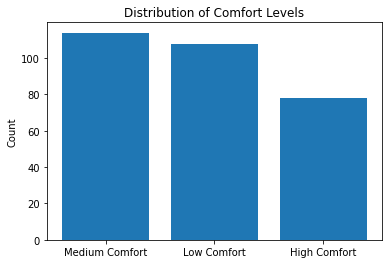

In [93]:
# Get the count of each unique value in y
value_counts = df_comfort['Comfort'].value_counts()

# Plot the bar chart
plt.bar(value_counts.index, value_counts.values)

# Add labels and title

plt.ylabel('Count')
plt.title('Distribution of Comfort Levels')

# Show the plot
plt.show()

In [94]:
value_counts

Medium Comfort    114
Low Comfort       108
High Comfort       78
Name: Comfort, dtype: int64

In [95]:
#Random Forest Comfort
rf0=RandomForestClassifier(class_weight='balanced',random_state=466)
rf0.fit(X1_train,y1_train)
predict_rf0=rf0.predict(X1_test)

accuracy_rf0=accuracy_score(predict_rf0,y1_test)
accuracy_rf0
print(classification_report(y1_test, predict_rf0))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.97        15
           2       0.95      0.90      0.92        20

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
# #Random Forest for Comfort2:
# rf1=RandomForestClassifier(class_weight='balanced',random_state=466)
# rf1.fit(X1_train,y1_train)
# predict_rf1=rf1.predict(X1_test)

# accuracy_rf1=accuracy_score(predict_rf1,y1_test)
# accuracy_rf1

0.9111111111111111

In [54]:
importances = rf1.feature_importances_
sorted_indices = np.argsort(importances)

# Display the sorted feature importances with their corresponding feature names
sorted_features = [X.columns[i] for i in sorted_indices]  # Assuming feature_names is a list of your feature names
sorted_importances = importances[sorted_indices]

print(sorted_features)



['Support_From_Close', 'Surgical_Treatment', 'Gender', 'Time_to_Treatment', 'Immunotherapy', 'Radiotherapy', 'Source_of_Income', 'Education_Level', 'Year_Diagnosed', 'Smoked_Cigarettes', 'Residence', 'Emotional_Impact', 'Molecular_targeted_Therapy', 'Marital_Status', 'Chemotherapy', 'Travel_Impact', 'Age_Group', 'Hospitalization_Number', 'Medical_Treatment_Need', 'Daily_Life_Impact_no_effect', 'ID', 'Symptoms_exp_None', 'Symptom_Household_Impact', 'Dependency_Fear', 'Symptom_Frequency']


In [96]:
#Decision Trees:
dt=DecisionTreeClassifier(random_state=466)
dt.fit(X1_train,y1_train)
predict_dt=dt.predict(X1_test)

accuracy_dt=accuracy_score(predict_dt,y1_test)
accuracy_dt

0.8666666666666667

In [97]:
import xgboost as xgb
# XGBoost model with imbalance handling
model = xgb.XGBClassifier()
model.fit(X1_train, y1_train)

# Predict
y1_pred = model.predict(X1_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y1_test, y1_pred)}")
print(classification_report(y1_test, y1_pred))

Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.87      0.87      0.87        15
           2       0.89      0.85      0.87        20

    accuracy                           0.89        45
   macro avg       0.89      0.91      0.90        45
weighted avg       0.89      0.89      0.89        45



In [110]:
svm=SVC()

In [111]:
svm.fit(X1_train,y1_train)

SVC()

In [112]:
predict_sv=svm.predict(X1_test)
confusion_matrix(y1_test,predict_sv)
print(classification_report(y1_test,predict_sv))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        15
           2       0.44      1.00      0.62        20

    accuracy                           0.44        45
   macro avg       0.15      0.33      0.21        45
weighted avg       0.20      0.44      0.27        45



/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## ML MODEL2 Based on Association Rules:

Engineering a feature based on the top 10 lnogest associated antesedents in the rules, corresponding consequents smallest which are comfort related

In [69]:
# sorted_apriori_rules = apriori_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
# Add length columns for antecedents and consequents
rules=apriori_rules.copy()
rules['antecedent_length'] = rules['antecedents'].apply(len)
rules['consequent_length'] = rules['consequents'].apply(len)

# Sort by antecedent length (descending) and consequent length (ascending)
sorted_rules = rules.sort_values(by=['antecedent_length', 'consequent_length'], ascending=[False, True])

# Display the sorted rules
print(sorted_rules['consequents'].head(10))


97984                    (Emotional_Impact)
97985                       (Travel_Impact)
97986                  (Support_From_Close)
97987     (Daily_Life_Impact_Psychological)
97988                 (Health_Satisfaction)
97989               (Coping_Strategy_Badly)
97990         (Work_Readiness_Dissatisfied)
97991      (Support_Satisfaction_Satisfied)
97992                        (Chemotherapy)
137156                   (Emotional_Impact)
Name: consequents, dtype: object


In [71]:
# Extract the top 10 rules after sorting by antecedent length (desc) and consequent length (asc)
top_rules = sorted_rules.head(10)

# Extract unique features from the antecedents
unique_antecedents = set().union(*top_rules['antecedents'])
unique_antecedents

{'Chemotherapy',
 'Coping_Strategy_Badly',
 'Daily_Life_Impact_Psychological',
 'Emotional_Impact',
 'Gender_Female',
 'Health_Satisfaction',
 'Support_From_Close',
 'Support_Satisfaction_Satisfied',
 'Travel_Impact',
 'Work_Readiness_Dissatisfied'}

In [72]:
sorted_rules['consequents'].head(10)

97984                    (Emotional_Impact)
97985                       (Travel_Impact)
97986                  (Support_From_Close)
97987     (Daily_Life_Impact_Psychological)
97988                 (Health_Satisfaction)
97989               (Coping_Strategy_Badly)
97990         (Work_Readiness_Dissatisfied)
97991      (Support_Satisfaction_Satisfied)
97992                        (Chemotherapy)
137156                   (Emotional_Impact)
Name: consequents, dtype: object

In [73]:
#will use Health Satisfaction, Travel Impact and Emotional impact to form a target col:

In [74]:
# Define weights for each column directly
weights = {'Health_Satisfaction':3 , 'Travel_Impact': -1, 'Emotional_Impact': -1}
# Compute the target using weighted sums of the existing columns
df_for_itemsets['Comfort2'] = (
    df_for_itemsets[list(weights.keys())]   # Select the columns based on weights keys
    .mul(weights)                           # Multiply each column by its respective weight
    .sum(axis=1)                            # Sum the weighted values across the columns
    .apply(lambda x: 1 if x > 0 else 0)      # Set 'Comfort' to 1 if the sum is positive, else 0
)
# Display the resulting DataFrame()
print(df_for_itemsets[['Health_Satisfaction', 'Travel_Impact', 'Emotional_Impact', 'Comfort2']])


     Health_Satisfaction  Travel_Impact  Emotional_Impact  Comfort2
0                      0              1                 1         0
1                      0              1                 1         0
2                      1              1                 1         1
3                      1              1                 1         1
4                      1              1                 1         1
..                   ...            ...               ...       ...
295                    0              0                 0         0
296                    1              1                 1         1
297                    0              0                 0         0
298                    0              1                 1         0
299                    1              1                 1         1

[300 rows x 4 columns]


In [75]:
unique_antecedents=list(unique_antecedents)
unique_antecedents

['Support_From_Close',
 'Gender_Female',
 'Chemotherapy',
 'Coping_Strategy_Badly',
 'Health_Satisfaction',
 'Travel_Impact',
 'Work_Readiness_Dissatisfied',
 'Daily_Life_Impact_Psychological',
 'Support_Satisfaction_Satisfied',
 'Emotional_Impact']

In [76]:
#based on this defining Test and Train sets:
#

X2=df_for_itemsets[[col for col in unique_antecedents if col not in ['Travel_Impact','Emotional_Support','Health_Satisfaction']]]


y2=df_for_itemsets['Comfort2']
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=466)

<BarContainer object of 2 artists>

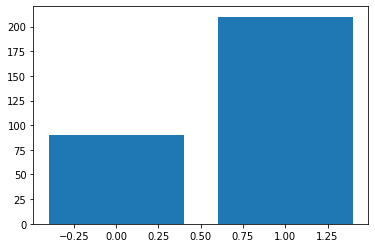

In [77]:
plt.bar(y2.value_counts().index,y2.value_counts().values)

In [78]:
#Random Forest:
rf2=RandomForestClassifier(class_weight='balanced',random_state=46)
rf2.fit(X2_train,y2_train)
predict_rf2=rf2.predict(X2_test)

accuracy_rf2=accuracy_score(predict_rf2,y2_test)
accuracy_rf2

0.9666666666666667

In [84]:
confusion_matrix(predict_rf2,y2_test)

array([[20,  2],
       [ 0, 38]])

Comparing this to a larger data set:

In [80]:
# Extract unique features from the antecedents
unique_antecedents1000 = set().union(*sorted_rules['antecedents'].head(1000))
unique_antecedents1000

{'Chemotherapy',
 'Coping_Strategy_Badly',
 'Daily_Life_Impact_Psychological',
 'Dependency_Fear_Very_large_extent',
 'Emotional_Impact',
 'Gender_Female',
 'Health_Satisfaction',
 'Marital_Status_Married',
 'Negative_Emotions_Often',
 'Quality_of_Life_Bad',
 'Radiotherapy',
 'Smoked_Cigarettes',
 'Support_From_Close',
 'Support_Satisfaction_Satisfied',
 'Symptom_Frequency_Most_of_time',
 'Symptom_Household_Impact_Often_affect',
 'Travel_Impact',
 'Work_Readiness_Dissatisfied'}

In [90]:
#based on this defining Test and Train sets:
#

X3=df_for_itemsets[[col for col in unique_antecedents1000 if col not in ['Travel_Impact','Emotional_Support','Health_Satisfaction']]]


y3=df_for_itemsets['Comfort2']
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.2,random_state=466)

In [89]:
#Random Forest:
rf3=RandomForestClassifier(random_state=46)
rf3.fit(X3_train,y3_train)
predict_rf3=rf3.predict(X3_test)

accuracy_rf3=accuracy_score(predict_rf3,y3_test)
accuracy_rf3

0.9666666666666667

In [91]:
print('Model Comparisons based on Comfort2 Feature defined in Model 2')

# Cross-validation to get error estimates (neg_log_loss can be used for classification)
cv_scores_rf1 = cross_val_score(rf1, X1_train, y1_train, cv=5, scoring='neg_log_loss')
cv_scores_rf2 = cross_val_score(rf2, X2_train, y2_train, cv=5, scoring='neg_log_loss')
cv_scores_rf3 = cross_val_score(rf3, X3_train, y3_train, cv=5, scoring='neg_log_loss')

print('MODEL CROSS VALIDATION ERROS')
print('------------------------------')
print(f'Cross Validation error for model rf1={max(abs(cv_scores_rf1))}')
print(f'Cross Validation error for model rf2={max(abs(cv_scores_rf2))}')
print(f'Cross Validation error for model rf3={max(abs(cv_scores_rf3))}')



# Get the average error (as negative log-likelihood)
error_rf1 = np.mean(np.abs(cv_scores_rf1))  # Use absolute value for neg_log_loss
error_rf2 = np.mean(np.abs(cv_scores_rf2))
error_rf3 = np.mean(np.abs(cv_scores_rf3))

# Number of observations and features
n = len(y1_train)
k_rf1 = rf1.n_estimators  # Number of trees for model 1
k_rf2 = rf2.n_estimators  # Number of trees for model 2
k_rf3 = rf3.n_estimators  # Number of trees for model 3


# Approximate AIC and BIC
aic_rf1 = 2 * k_rf1 + n * np.log(error_rf1 ** 2 / n)
bic_rf1 = np.log(n) * k_rf1 + n * np.log(error_rf1 ** 2 / n)

aic_rf2 = 2 * k_rf2 + n * np.log(error_rf2 ** 2 / n)
bic_rf2 = np.log(n) * k_rf2 + n * np.log(error_rf2 ** 2 / n)

aic_rf3 = 2 * k_rf3 + n * np.log(error_rf3** 2 / n)
bic_rf3 = np.log(n) * k_rf3 + n * np.log(error_rf3 ** 2 / n)

# Print results
print('AIC/BIC RESULTS')
print('------------------------------')
print(f"Model 1 AIC: {aic_rf1}, BIC: {bic_rf1}")
print(f"Model 2 AIC: {aic_rf2}, BIC: {bic_rf2}")
print(f"Model 3 AIC: {aic_rf3}, BIC: {bic_rf3}")



# Print results
print('MODEL ACCURACIES')
print('------------------------------')
print(f"Model 1 Accuracy  {accuracy_rf1}")
print(f"Model 2 Accuracy  {accuracy_rf2}")
print(f"Model 3 Accuracy  {accuracy_rf3}")






Model Comparisons based on Comfort2 Feature defined in Model 2
MODEL CROSS VALIDATION ERROS
------------------------------
Cross Validation error for model rf1=0.9407798163012131
Cross Validation error for model rf2=1.079159785394659
Cross Validation error for model rf3=1.6082758898431029
AIC/BIC RESULTS
------------------------------
Model 1 AIC: -1790.7662906933651, BIC: -1436.6399361775225
Model 2 AIC: -1470.012580096743, BIC: -1115.8862255809004
Model 3 AIC: -1251.4599198744922, BIC: -897.3335653586497
MODEL ACCURACIES
------------------------------
Model 1 Accuracy  0.9111111111111111
Model 2 Accuracy  0.9666666666666667
Model 3 Accuracy  0.9666666666666667


Looking at the comparison above although Model 1 has lowest CV scores and AIC but also lowest accuracy.
Model 2 and Model3 which have significantly less amount of features, are almost have the same performance but Model 2 has lower AIC/BIC and lower features as well. 
